In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import gseapy as gp
from gseapy.plot import gseaplot
gp.__path__
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("BoNE")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

cf = "bemisc/explore.conf"

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import bone
reload(bone)
class BESAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)
    
    def getSen2020(self, tn=1):
        self.prepareData("BE1", cfile=cf)
        atype = self.h.getSurvName("c protocol")
        ahash = {'SPT6':1, 'CTL':0}
        atypes = ['CTL', 'SPT6 KO']
        if tn == 2:
            ahash = {'SPT6':0, 'CTL':1}
            atypes = ['SPT6 KO', 'CTL']
        self.initData(atype, atypes, ahash)

    def getSen2021(self, tn=1):
        self.prepareData("BE29", cfile=cf)
        atype = self.h.getSurvName('c Type')
        atypes = ['CTL', 'SPT6']
        ahash = {'CTL':0, 'SPT6':1}
        if (tn == 2):
            atype = self.h.headers
            ahash = {'CTL_2':0, 'CTL_1':0, 'SPT6_1':1, 'SPT6_2':1}
        self.initData(atype, atypes, ahash)
    
    def getHuang2020(self, tn=1):
        self.prepareData("BE2", cfile=cf)
        atype = self.h.getSurvName("c genotype (ch1)")
        ahash = {'p63-/- mouse':1, 'p63-/-;Cdx2 mouse':1, 'WT mouse':0}
        atypes = ['N', 'T']
        if (tn == 2):
            atypes = ['N', 'T', 'C']
            ahash = {'WT mouse': 0, 'p63-/- mouse':1, 'p63-/-;Cdx2 mouse':2}
        if (tn ==3):
            atype = self.h.getSurvName("c genotype (ch1)")
            ahash = {'p63-/- mouse':1, 'WT mouse':0}
            atypes = ['WT', 'p63-/-']
        self.initData(atype, atypes, ahash)

    def getCummings2017(self):
        self.prepareData("BE6", cfile=cf)
        atype = self.h.getSurvName('c tissue (ch1)')
        ahash = {'Normal esophageal squamous mucosa':0, "Barrett's esophagus segment":1}
        atypes = ['N', 'BE']
        self.initData(atype, atypes, ahash)

    def getYamamoto1(self, tn=1):
        self.prepareData("BE7", cfile=cf)
        atype = self.h.getSurvName('c cell type (ch1)')
        ahash = {"Barett's esophagus stem cells":1, "Normal esophagus stem cells":0}
        atypes = ['N', 'BE']
        if tn == 2:
            atypes = ['N', 'BE', 'GC']
            ahash["Gastric cardia stem cells"] = 2
        
        self.initData(atype, atypes, ahash)

    def getYamamoto2(self, tn=1):
        self.prepareData("BE8", cfile=cf)
        atype = self.h.getSurvName('c cell type (ch1)')
        ahash = {"Barett's esophagus stem cells":1, "Normal esophagus stem cells":0}
        atypes = ['N', 'BE']
        if tn == 2:
            atypes = ['N', 'BE', 'GC']
            ahash["Gastric cardia stem cells"] = 2
        if tn == 3:
            atypes = ['N', 'GC']
            ahash = {"Gastric cardia stem cells":1, "Normal esophagus stem cells":0}
        self.initData(atype, atypes, ahash)
        
    def getHyland2014(self, tn=1):
        self.prepareData("BE9", cfile=cf)
        atype = self.h.getSurvName('c cell type (ch1)')
        ahash = {"BE":1, "NE":0}
        atypes = ['N', 'BE']
        if tn == 2:
            atypes = ['N', 'BE', 'GC']
            ahash = {"BE":1, "NE":0, "NC":2}
        if tn == 3:
            atypes = ['NE', 'GC']
            ahash = {"NE":0, "NC":1}
        self.initData(atype, atypes, ahash)

    def getMcKeon2014(self):
        self.prepareData("BE10", cfile=cf)
        atype = self.h.getSurvName('c disease state (ch1)')
        ahash = {"control":0, "Barrett's esophagus":1}
        atypes = ['N', 'BE']
        self.initData(atype, atypes, ahash)

    def getWang2013(self, tn=1):
        self.prepareData("BE11", cfile=cf)
        atype = self.h.getSurvName('c tissue type (ch1)')
        ahash = {'esophageal squamous epithelium':0, "Barrett's esophagus":1}
        atypes = ['N', 'BE']
        if tn == 2:
            ahash['esophageal squamous cell carcinoma'] = 2
            ahash['esophageal adenocarcinoma'] = 3
            atypes = ['NE', 'BE', 'C', 'AC']

        self.initData(atype, atypes, ahash)

    def getLao2012(self, tn=1):
        self.prepareData("BE12", cfile=cf)
        atype = self.h.getSurvName('c tissue (ch1)')
        ahash = {'normal esopahgus':0, "Barrett's":1}
        atypes = ['N', 'BE']
        if tn == 2:
            ahash['gastric cardia'] = 2
            atypes = ['N', 'BE', 'GC']
        self.initData(atype, atypes, ahash)

    def getStairs2008(self, tn=1):
        self.prepareData("BE13", cfile=cf)
        atype = self.h.getSurvName('c source_name (ch1)')
        ahash = {"biopsy of normal esophagus from the same patient as a matched Barrett's esophagus biposy":0, "biopsy of Barrett's esophagus from the same patient as a matched normal esophagus biposy":1}
        atypes = ['N', 'BE']
        if tn == 2:
            ahash = {"biopsy of normal esophagus from the same patient as a matched Barrett's esophagus biposy":0, "biopsy of Barrett's esophagus from the same patient as a matched normal esophagus biposy":1, "biopsy of normal small intestine":2}
            atypes = ['NE', 'BE', 'SI']
        if tn == 3:
            ahash = {"biopsy of normal esophagus from the same patient as a matched Barrett's esophagus biposy":0, "biopsy of normal small intestine":1}
            atypes = ['NE', 'SI']
        if tn == 4:
            ahash = {"biopsy of Barrett's esophagus from the same patient as a matched normal esophagus biposy":0, "biopsy of normal small intestine":1}
            atypes = ['BE', 'SI']
        self.initData(atype, atypes, ahash)

    def getMacCarthy2015(self, tn=1):
        self.prepareData('BE19', cfile=cf)
        atype = self.h.getSurvName('c degree of dysplasia (ch1)')
        atypes = ['LGD', 'HGD', 'SIM']
        ahash = {'Low Grade Dsyplasia':0, 'High Grade Dsyplasia':1, 'Simple intestinal metaplasia':2}
        if (tn == 2):
            atype = self.h.headers
            atypes = ['BE']
            ahash = {'GSM1423129':0,'GSM1423130':0}
        self.initData(atype, atypes, ahash)
        
    def getDonnellan2007(self):
        self.prepareData('BE21', cfile=cf)
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['Unexposed', '2 hrs', '6 hrs']
        ahash = {'unexposed cells':0, 
                 '2 hours after 15 minute exposure to acid, pH 4.5':1, 
                 '2 hours after 15 minute exposure to a mix of primary bile salts':1,
                 '2 hours after 15 minute exposure to deoxycholic acid, pH 4.5':1,
                 '6 hours after 15 minute exposure to acid, pH 4.5':2,
                 '6 hours after 15 minute exposure to deoxycholic acid, pH 4.5 ':2,
                 '6 hours after 15 minute exposure to a mix of primary bile salts':2}
        self.initData(atype, atypes, ahash)
        
    def getSorensen2015(self):
        self.prepareData('BE25', cfile=cf)
        atype = self.h.getSurvName('c cell line (ch1)')
        atypes = ['SiHa', 'FaDuDD', 'UTSCC5', 'UTSCC14', 'UTSCC15']
        ahash = {'SiHa':0, 
                 'FaDuDD':1, 
                 'UTSCC5':2,
                 'UTSCC14':3,
                 'UTSCC15':4}
        self.initData(atype, atypes, ahash)

    def getBESI2021(self):
        self.prepareData("BE28", cfile=cf)
        atype = self.h.getSurvName('c Type')
        atypes = ['SI', 'BE']
        ahash = {'BE':1, 'SI':0}
        self.initData(atype, atypes, ahash)
        
    def getSuntsova2019(self, tn=1):
        self.prepareData("GL33", cfile=cf)
        atype = self.h.getSurvName('c tissue')
        atypes = ['Colon']
        ahash = {'Colon':0, 'Colon, epithelium':0}
        if (tn == 2):
            atype = self.h.headers
            atypes = ['Colon', 'Brain', 'Skeletal muscle']
            ahash = {'GSM3415805':0, 'GSM3415851':0, 'GSM3415854':1,
                     'GSM3415888':1, 'GSM3415810':2,'GSM3415864':2}    
    
    def Roberts2021fat(self, tn=1):
        self.prepareData("GL35", cfile=cf)
        atype = self.h.getSurvName('c agent')
        atypes = ['U', 'T']
        ahash = {'forskolin':1, 'untreated':0}
        if (tn == 2):
            atype = self.h.headers
            atypes = ['Adipocyte']
            ahash = {'GSM3701297':0,'GSM3701298':0}
        self.initData(atype, atypes, ahash)
        
    def Pennycuick2020trachea(self, tn=1):
        self.prepareData("GL36", cfile=cf)
        atype = self.h.getSurvName('c group')
        atypes = ['P', 'A']
        ahash = {'Paediatric':0, 'Adult':1}
        if (tn == 2):
            atype = self.h.headers
            atypes = ['Trachea']
            ahash = {'GSM4483227':0,'GSM4483241':0}
        self.initData(atype, atypes, ahash)
        
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def saveRnk(ana, ofile, n1, n2):
    g1 = [i for i in ana.order if ana.aval[i] == n1]
    g2 = [i for i in ana.order if ana.aval[i] == n2]
    fp = ana.h.fp;
    fp.seek(0, 0);
    head = fp.readline();
    of = open(ofile, "w")
    index = 0
    ahash = {}
    #mhash = getMmHs()
    mhash = {}
    for line in fp:
        line = re.sub("[\r\n]", "", line)
        ll = line.split("\t")
        if len([i for i in ana.order if ll[i] == '']) > 0:
            continue
        v1 = [float(ll[i]) for i in g1]
        v2 = [float(ll[i]) for i in g2]
        rnk = np.mean(v2) - np.mean(v1)
        id1 = ana.h.getSimpleName(ll[0])
        if id1 in mhash:
            id1 = mhash[id1][0]
        else:
            id1 = id1.upper()
        if id1 not in ahash:
            of.write("\t".join([id1, str(rnk)]) +"\n")
        ahash[id1] = rnk
        index += 1
    of.close()

# Figure 1

### Fig 1E
GSEA Wang BE UP and DOWN gene signature on GSE153129 (SPT6 KO vs CTL)

Sen 2020 SPT6 (n = 6)
GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1
6 [3, 3] GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1 BE1
[8, 21]


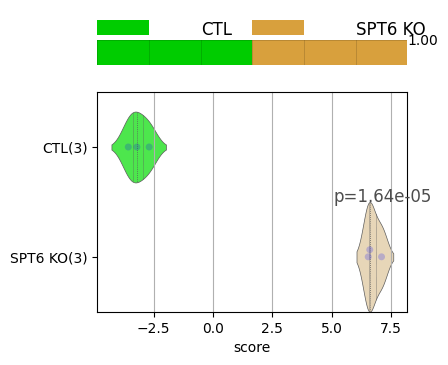

In [3]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getSen2020()
f = open('bemisc/gsea-be-up.txt','r')
lines = f.readlines()[2:]
f.close()
up = [x.strip() for x in lines]

f = open('bemisc/gsea-be-down.txt','r')
lines = f.readlines()[2:]
f.close()
down = [x.strip() for x in lines]
l1 = [up, down]
wt1 = [1, -1]
fig = processData(ana, l1, wt1, None, 1)

### Fig 1F
GSEA Wang BE UP gene signature on GSE153129 (SPT6 KO vs CTL)

Sen 2020 SPT6 (n = 6)
GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1
6 [3, 3] GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1 BE1
[8]


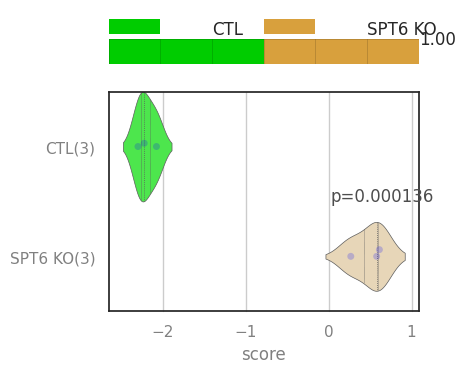

In [4]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getSen2020()
f = open('bemisc/gsea-be-up.txt','r')
lines = f.readlines()[2:]
f.close()
up = [x.strip() for x in lines]

l1 = [up]
wt1 = [1]
fig = processData(ana, l1, wt1, None, 1)

### Fig 1G
GSEA Wang BE DOWN gene signature on GSE153129 (SPT6 KO vs CTL)

Sen 2020 SPT6 (n = 6)
GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1
6 [3, 3] GSE153129 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE1 BE1
[21]


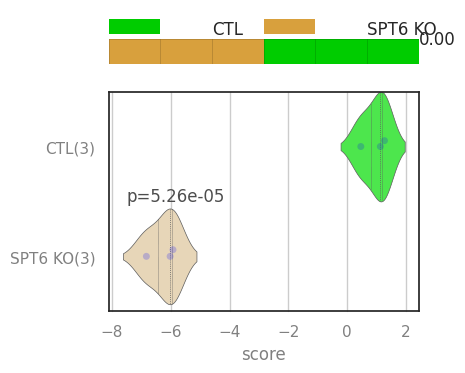

In [5]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getSen2020()

f = open('bemisc/gsea-be-down.txt','r')
lines = f.readlines()[2:]
f.close()
down = [x.strip() for x in lines]
l1 = [down]
wt1 = [1]
fig = processData(ana, l1, wt1, None, 1)

### Fig 1H
GSE153129 (SPT6 KO vs CTL) UP and DOWN gene signature on GSE100843, GSE65013, GSE64894, GSE39491, GSE49292, GSE26886, GSE34619, GSE13083

In [6]:
df = pd.read_excel("bemisc/GSE153129-Supplementary-4.xlsx", skiprows=9)
c1 = np.logical_and(df['Fold-change (SPT6i vs. CTLi)'] > 10,  df['p-value'] < 0.1)
c2 = np.logical_and(df['Fold-change (SPT6i vs. CTLi)'] < -10,  df['p-value'] < 0.1)
up = list(df[c1]['Gene Symbol'])
down = list(df[c2]['Gene Symbol'])
l1 = [up, down]
wt1 = [1, -1]

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6 BE6
[466, 513]


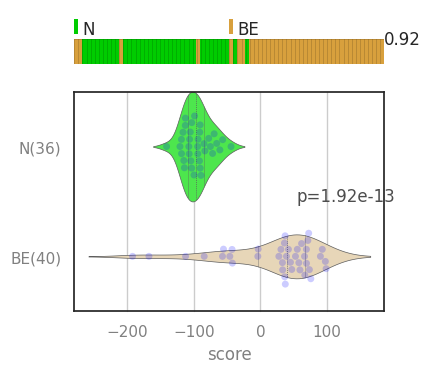

In [7]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getCummings2017()

fig = processData(ana, l1, wt1, None, 1)

Yamamoto 2015 BE Esophagus Human (n = 66)
GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7
32 [6, 26] GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7 BE7
[295, 461]


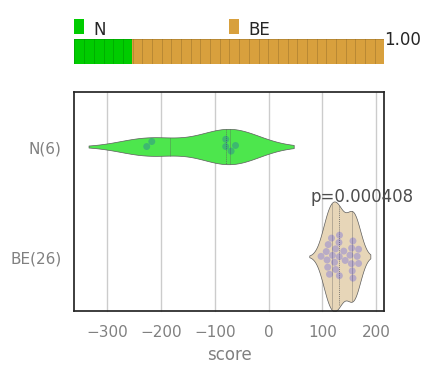

In [8]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto1()

fig = processData(ana, l1, wt1, None, 1)

Yamamoto 2015 BE Esophagus Human 2 (n = 19)
GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8
17 [3, 14] GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8 BE8
[662, 885]


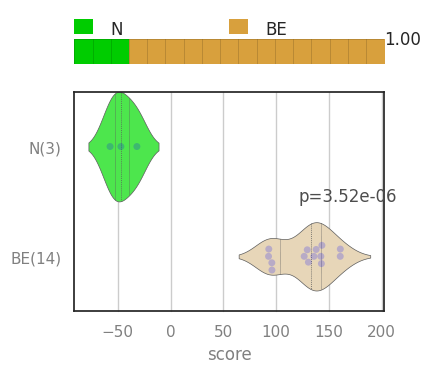

In [9]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto2()

fig = processData(ana, l1, wt1, None, 1)

Hyland 2014 BE compared to normal mucosa (n = 120)
GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9
80 [40, 40] GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9 BE9
[299, 452]


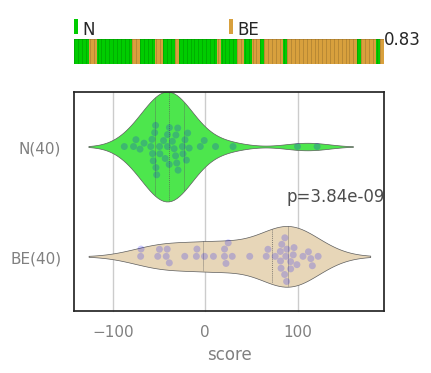

In [10]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHyland2014()

fig = processData(ana, l1, wt1, None, 1)

McKeon 2015 BE stem cells (n = 9)
GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10
9 [3, 6] GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10 BE10
[295, 461]


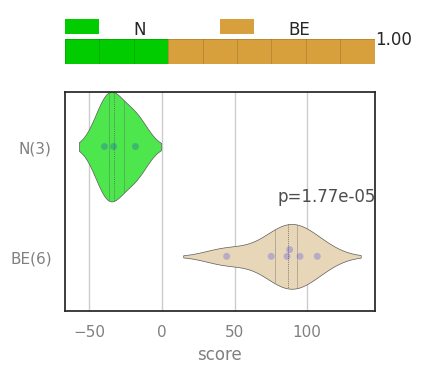

In [11]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getMcKeon2014()

fig = processData(ana, l1, wt1, None, 1)

Wang 2013 BE (n = 69)
GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11
39 [19, 20] GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11 BE11
[662, 885]


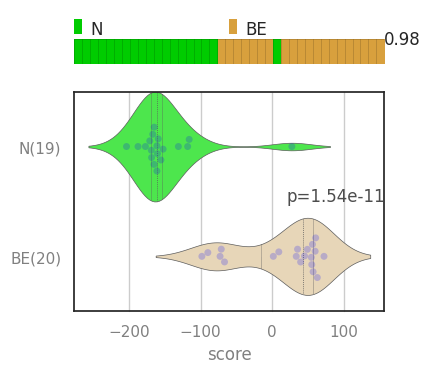

In [12]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getWang2013()

fig = processData(ana, l1, wt1, None, 1)

Lao-Sirieix 2012 BE (n = 28)
GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12
18 [8, 10] GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12 BE12
[505, 538]


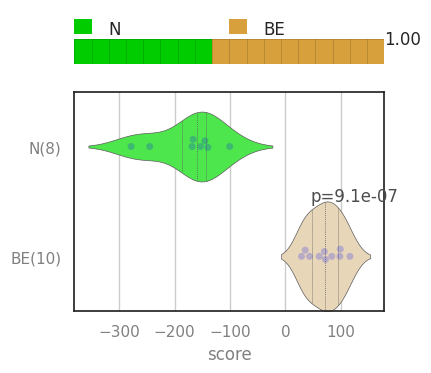

In [13]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getLao2012()

fig = processData(ana, l1, wt1, None, 1)

Stairs 2008 BE (n = 19)
GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13
14 [7, 7] GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13 BE13
[299, 452]


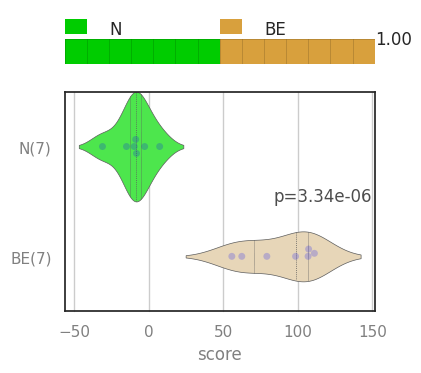

In [14]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getStairs2008()

fig = processData(ana, l1, wt1, None, 1)

Huang 2020 Esophageal Epithelium Mice (n = 9)
GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2
7 [4, 3] GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2 BE2
[359, 587]


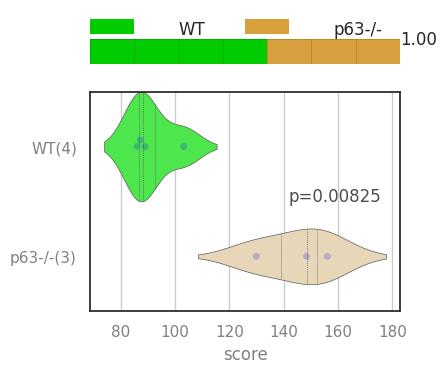

In [15]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHuang2020(3)

fig = processData(ana, l1, wt1, None, 1)

### Fig 1I
GSE153129 (SPT6 KO vs CTL) UP gene signature on GSE100843, GSE65013, GSE64894, GSE39491, GSE49292, GSE26886, GSE34619, GSE13083

In [16]:
df = pd.read_excel("bemisc/GSE153129-Supplementary-4.xlsx", skiprows=9)
c1 = np.logical_and(df['Fold-change (SPT6i vs. CTLi)'] > 10,  df['p-value'] < 0.1)
up = list(df[c1]['Gene Symbol'])

lup = [up]
wtup = [1]

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6 BE6
[466]


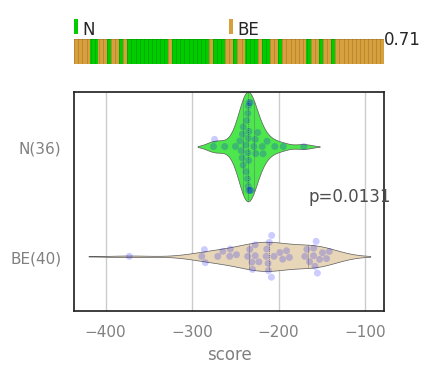

In [17]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getCummings2017()

fig = processData(ana, lup, wtup, None, 1)

Yamamoto 2015 BE Esophagus Human (n = 66)
GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7
32 [6, 26] GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7 BE7
[295]


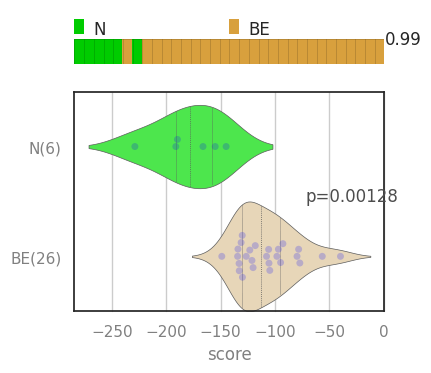

In [18]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto1()

fig = processData(ana, lup, wtup, None, 1)

Yamamoto 2015 BE Esophagus Human 2 (n = 19)
GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8
17 [3, 14] GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8 BE8
[662]


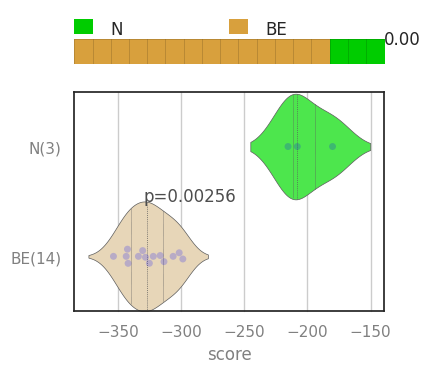

In [19]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto2()

fig = processData(ana, lup, wtup, None, 1)

Hyland 2014 BE compared to normal mucosa (n = 120)
GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9
80 [40, 40] GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9 BE9
[299]


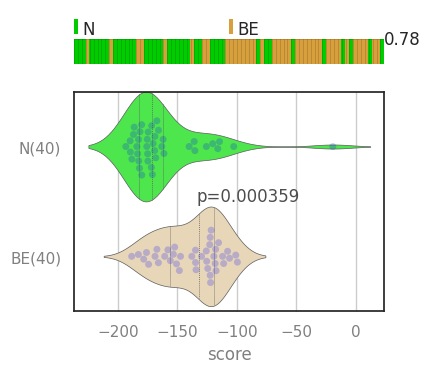

In [20]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHyland2014()

fig = processData(ana, lup, wtup, None, 1)

McKeon 2015 BE stem cells (n = 9)
GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10
9 [3, 6] GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10 BE10
[295]


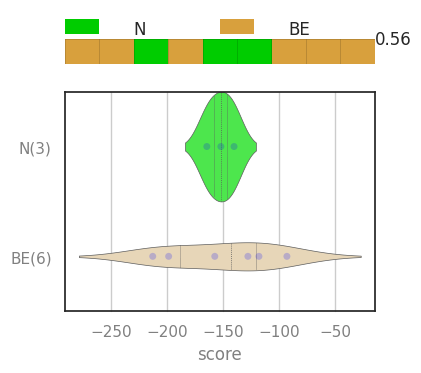

In [21]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getMcKeon2014()

fig = processData(ana, lup, wtup, None, 1)

Wang 2013 BE (n = 69)
GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11
39 [19, 20] GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11 BE11
[662]


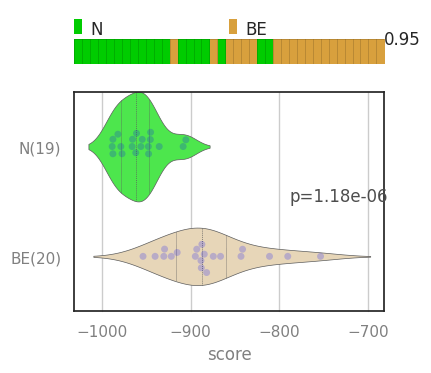

In [22]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getWang2013()

fig = processData(ana, lup, wtup, None, 1)

Lao-Sirieix 2012 BE (n = 28)
GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12
18 [8, 10] GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12 BE12
[505]


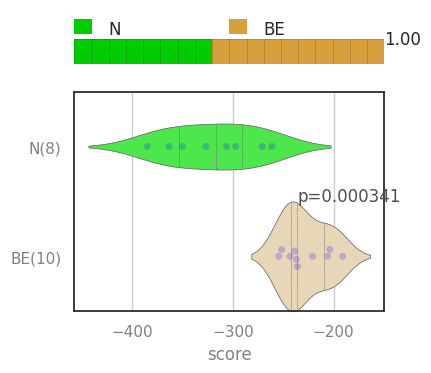

In [23]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getLao2012()

fig = processData(ana, lup, wtup, None, 1)

Stairs 2008 BE (n = 19)
GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13
14 [7, 7] GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13 BE13
[299]


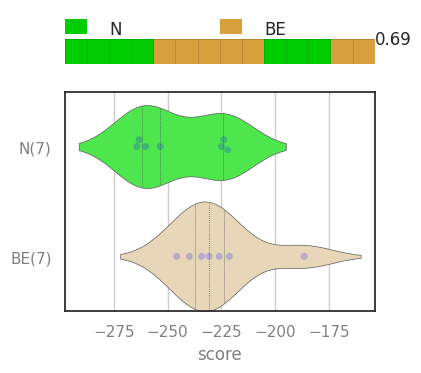

In [24]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getStairs2008()

fig = processData(ana, lup, wtup, None, 1)

Huang 2020 Esophageal Epithelium Mice (n = 9)
GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2
7 [4, 3] GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2 BE2
[359]


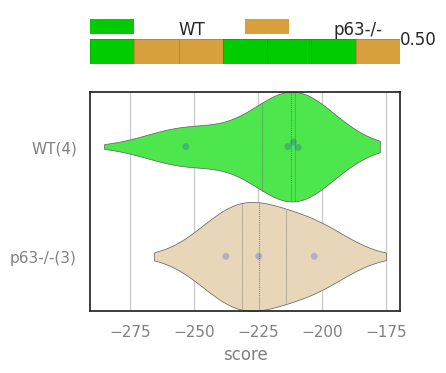

In [25]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHuang2020(3)

fig = processData(ana, lup, wtup, None, 1)

### Fig 1J
GSE153129 (SPT6 KO vs CTL) DOWN gene signature on GSE100843, GSE65013, GSE64894, GSE39491, GSE49292, GSE26886, GSE34619, GSE13083

In [26]:
df = pd.read_excel("bemisc/GSE153129-Supplementary-4.xlsx", skiprows=9)
c2 = np.logical_and(df['Fold-change (SPT6i vs. CTLi)'] < -10,  df['p-value'] < 0.1)
down = list(df[c2]['Gene Symbol'])
ldown = [down]
wtdown = [1]

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE6 BE6
[513]


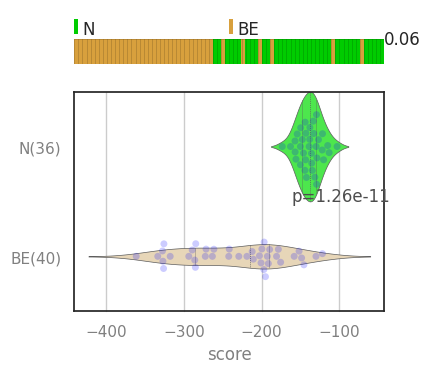

In [27]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getCummings2017()

fig = processData(ana, ldown, wtdown, None, 1)

Yamamoto 2015 BE Esophagus Human (n = 66)
GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7
32 [6, 26] GSE65013 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE7 BE7
[461]


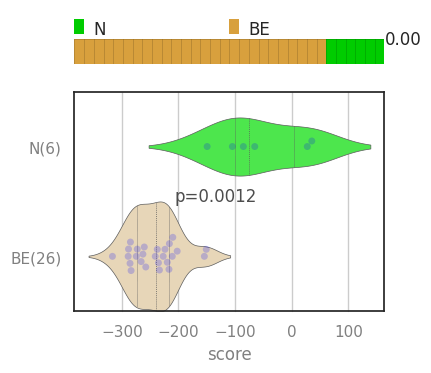

In [28]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto1()

fig = processData(ana, ldown, wtdown, None, 1)

Yamamoto 2015 BE Esophagus Human 2 (n = 19)
GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8
17 [3, 14] GSE64894 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE8 BE8
[885]


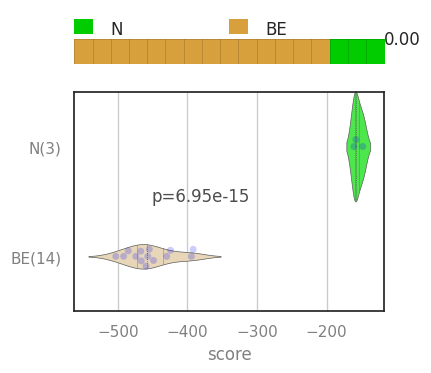

In [29]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getYamamoto2()

fig = processData(ana, ldown, wtdown, None, 1)

Hyland 2014 BE compared to normal mucosa (n = 120)
GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9
80 [40, 40] GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE9 BE9
[452]


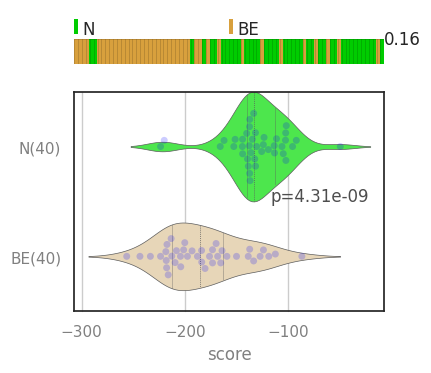

In [30]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHyland2014()

fig = processData(ana, ldown, wtdown, None, 1)

McKeon 2015 BE stem cells (n = 9)
GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10
9 [3, 6] GSE49292 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE10 BE10
[461]


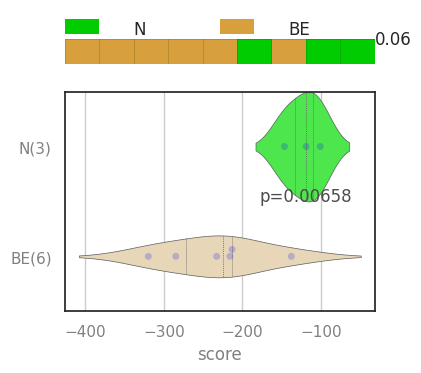

In [31]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getMcKeon2014()

fig = processData(ana, ldown, wtdown, None, 1)

Wang 2013 BE (n = 69)
GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11
39 [19, 20] GSE26886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE11 BE11
[885]


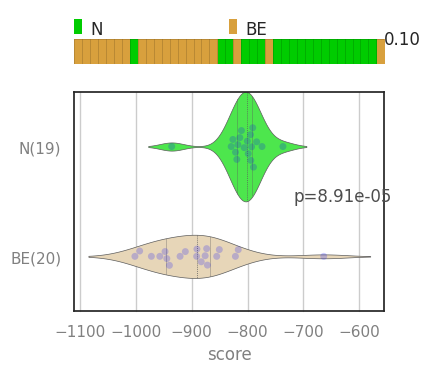

In [32]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getWang2013()

fig = processData(ana, ldown, wtdown, None, 1)

Lao-Sirieix 2012 BE (n = 28)
GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12
18 [8, 10] GSE34619 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE12 BE12
[538]


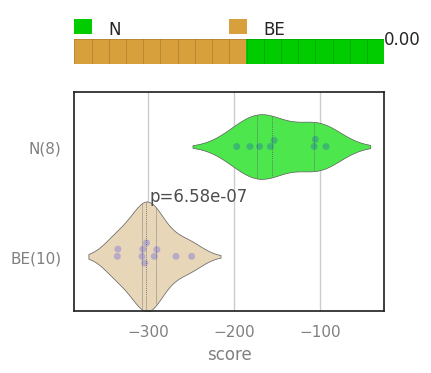

In [33]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getLao2012()

fig = processData(ana, ldown, wtdown, None, 1)

Stairs 2008 BE (n = 19)
GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13
14 [7, 7] GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13 BE13
[452]


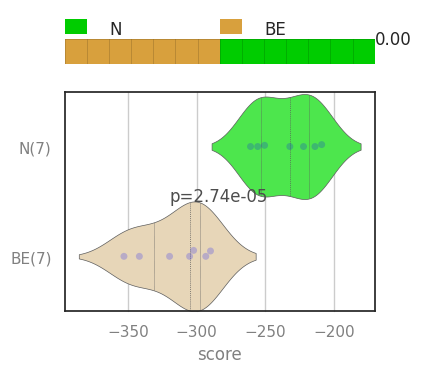

In [34]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getStairs2008()

fig = processData(ana, ldown, wtdown, None, 1)

Huang 2020 Esophageal Epithelium Mice (n = 9)
GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2
7 [4, 3] GSE96831 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE2 BE2
[587]


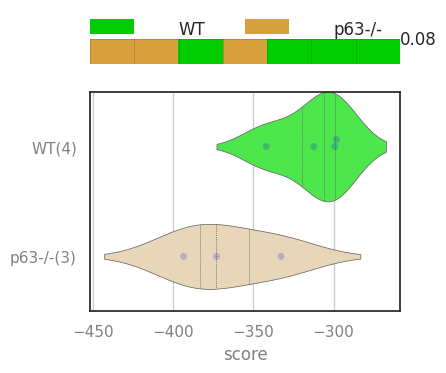

In [35]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getHuang2020(3)

fig = processData(ana, ldown, wtdown, None, 1)

### Fig 1K
Correlation Analysis

Sen SPT6 CTL organoids (kallisto) 2021 (n = 6)
PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE29
4 [2, 2] PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE29 BE29
Roberts 2021 fat (n = 6)
GSE129153 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL35
2 [2] GSE129153 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL35 GL35
Pennycuick 2020 trachea (n = 24)
GSE148818 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL36
2 [2] GSE148818 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL36 GL36
MacCarthy 2015 BO (Barrett's Oesophagus) (n = 21)
GSE58963 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE19
2 [2] GSE58963 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE19 BE19


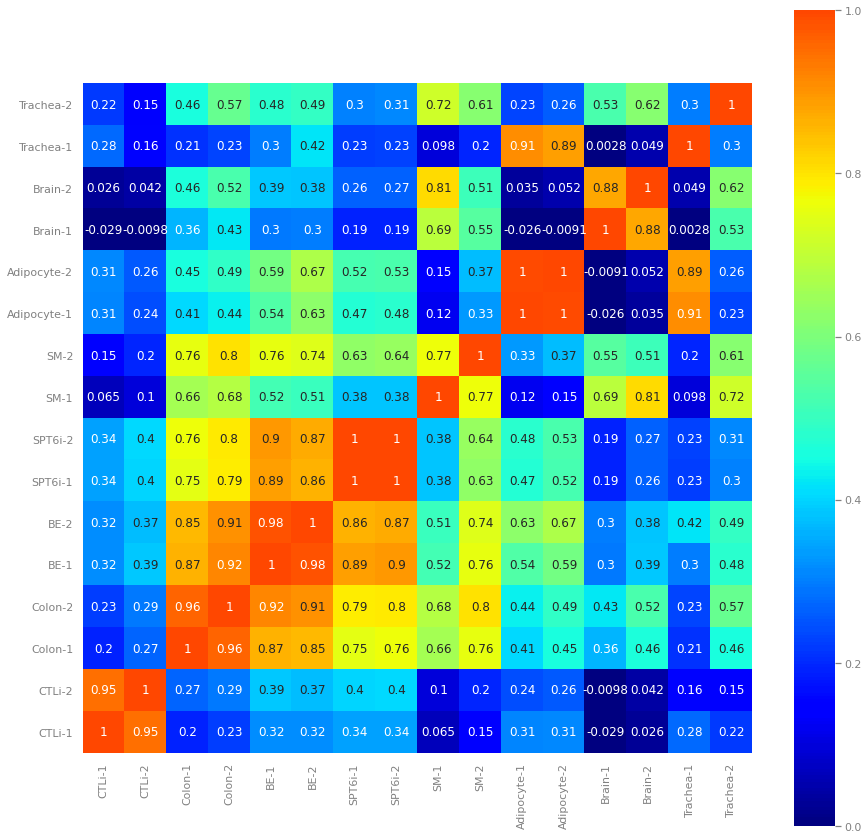

In [36]:
df = pd.read_csv("/Users/dtv004/Daniella/BoNE/bemisc/sen-degs.txt", sep='\t')

up = list(df[df['Fold-change (SPT6i vs. CTLi)'] > 10]['Gene Symbol'])
down = list(df[df['Fold-change (SPT6i vs. CTLi)'] < -10]['Gene Symbol'])
l1 = up[0:50] + down[0:50]

ana = BESAnalysis()
ana.getSen2021(2)
df1 = pd.read_csv(ana.h.getExprFile(), sep="\t")
df1['Name'] = df1['Name'].str.split(':').str[0]
df1 = df1[df1['Name'].isin(l1)]
df1 = df1.rename(columns={'CTL_1':'CTLi-1', 'CTL_2':'CTLi-2','SPT6_1':'SPT6i-1', 'SPT6_2':'SPT6i-2'})
df1 = df1[['Name', 'CTLi-1', 'CTLi-2', 'SPT6i-1', 'SPT6i-2']]

ana.getSuntsova2019(2)
df2 = pd.read_csv(ana.h.getExprFile(), sep="\t")
df2 = df2.rename(columns={'GSM3415805':'Colon-1', 'GSM3415821':'Colon-2',
                   'GSM3415854':'Brain-1', 'GSM3415888':'Brain-2',
                   'GSM3415810':'SM-1','GSM3415864':'SM-2'})
df2 = df2[['Name', 'Colon-1', 'Colon-2', 'Brain-1', 'Brain-2', 'SM-1', 'SM-2']]
df = pd.merge(df1, df2, how='inner', on='Name')

ana.Roberts2021fat(2)
df2 = pd.read_csv(ana.h.getExprFile(), sep="\t")
df2 = df2.rename(columns={'GSM3701297':'Adipocyte-1','GSM3701298':'Adipocyte-2'})
df2 = df2[['Name', 'Adipocyte-1', 'Adipocyte-2']]
df = pd.merge(df, df2, how='inner', on='Name')

ana.Pennycuick2020trachea(2)
df2 = pd.read_csv(ana.h.getExprFile(), sep="\t")
df2 = df2.rename(columns={'GSM4483227':'Trachea-1','GSM4483241':'Trachea-2'})
df2 = df2[['Name', 'Trachea-1', 'Trachea-2']]
df = pd.merge(df, df2, how='inner', on='Name')

ana.getMacCarthy2015(2)
df2 = pd.read_csv(ana.h.getExprFile(), sep="\t")
df2 = df2.rename(columns={'GSM1423129':'BE-1','GSM1423130':'BE-2'})
df2 = df2[['Name', 'BE-1', 'BE-2']]
df = pd.merge(df, df2, how='inner', on='Name')

df = df.set_index('Name')
df = np.power(2, df) - 1
df = df[['CTLi-1', 'CTLi-2', 'Colon-1', 'Colon-2', 'BE-1', 'BE-2',
            'SPT6i-1', 'SPT6i-2', 'SM-1', 'SM-2', 'Adipocyte-1', 'Adipocyte-2',
            'Brain-1', 'Brain-2', 'Trachea-1', 'Trachea-2']]
corr = df.corr()
l1 = list(corr.index)
l1.reverse()
corr = corr.loc[l1,:]
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.6,
    cmap="jet",
    square=True,
    ax = ax,
    annot = True
)

# Figure 2

Enrichment analysis

In [44]:
mm = [["Cyp2f2", "Krt6a", 'Pax9', 'Adh7', 'Upk2', 'Muc4', 'Sox1', 'Upk1b', 'Gapbrp', 'Upk1a',
              'Ceacam1', 'Cxcl17', 'Car4', 'Krt31', 'Runx2', 'Krt7'],['Nr5a2', 'Muc3', 'Tinag', 'Afm', 'Hnf4a', 'Muc2', 'Cdx1', 'lsx', 'Tff3', 'Lgals2', 'Cdx2',
               'Alpi', 'Apob', 'Fabp2', 'Lct', 'Apoc3']]

with open('bemisc/GSEA/Wang-metaplasia-intestine-specific-genes.txt', 'w') as f:
    for i in mm:
        print(*i, sep='\t', file=f)

In [45]:
met_mm = []
int_mm = []

with open('bemisc/GSEA/Wang-metaplasia-intestine-specific-genes.txt', 'r') as f:
    lines = f.readlines()
    met_mm = lines[0].strip().split('\t')
    int_mm = lines[1].strip().split('\t')
    
mm = [met_mm, int_mm]
hs = bone.getGroupsHs(mm)

met_hs = hs[0]
int_hs = hs[1]
met_int_hs = hs[0] | hs[1]
with open('bemisc/GSEA/Wang-met-int-genes.gmt', 'w') as f:
    print('METAPLASIA-SPECIFIC-BE', 'METAPLASIA-SPECIFIC-BE', *met_hs, sep='\t', file=f)
    print('INTESTINE-SPECIFIC-BE', 'INTESTINE-SPECIFIC-BE', *int_hs, sep='\t', file=f)
    print('METAPLASIA-INTESTINE-SPECIFIC-BE', 'METAPLASIA-INTESTINE-SPECIFIC-BE', *met_int_hs, sep='\t', file=f)

### Fig 2B
Enrichment Analysis, Barrett's Esophagus and Small Intestine (GSE13083)

Stairs 2008 BE (n = 19)
GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13
19 [7, 7, 5] GSE13083 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE13 BE13


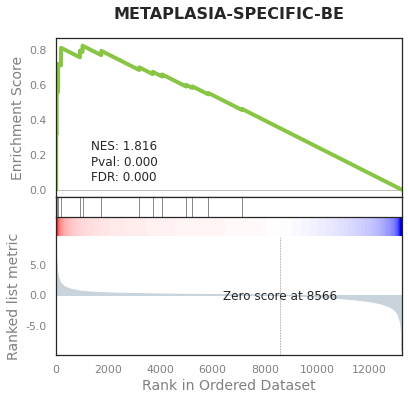

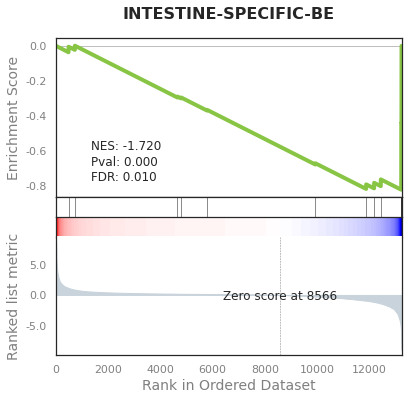

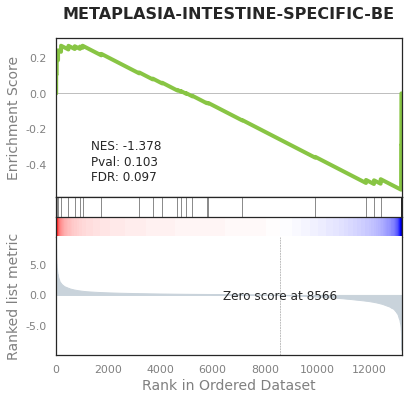

In [46]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getStairs2008(2)

# Rank file
saveRnk(ana, 'bemisc/GSEA/GSE13083-met-int.rnk', 2, 1)
rnk = pd.read_table('bemisc/GSEA/GSE13083-met-int.rnk', header=None)
 
    
# Enrichment analysis
pre_res = gp.prerank(rnk=rnk, gene_sets='bemisc/GSEA/Wang-met-int-genes.gmt', min_size=13,
                         processes=4,
                         permutation_num=100, # reduce number to speed up test
                         outdir='bemisc/GSEA/gsea-met-int-GSE13083',format='png')

terms = pre_res.res2d.index
for term in terms:
        g = gp.plot.GSEAPlot(rank_metric=pre_res.ranking, term=term, **pre_res.results[term])
        g.add_axes()

### Fig 2C
Enrichment Analysis, SPT6-depleted (GSE153129) versus Small Intestine Samples (GSE157059)

SPT6 SI organoids 2021 (n = 6)
PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE28
6 [3, 3] PG http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE28 BE28


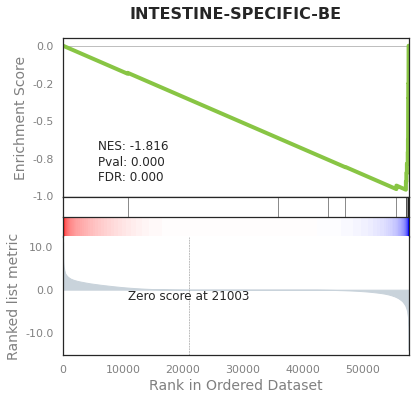

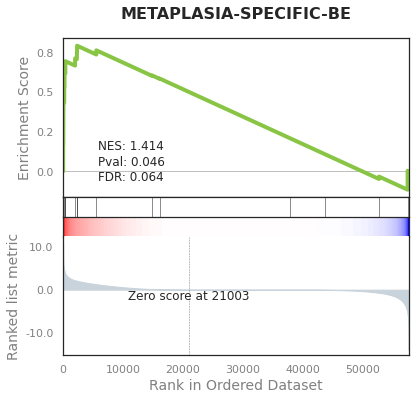

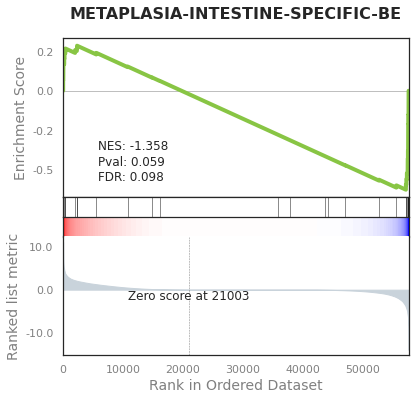

In [47]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getBESI2021()

# Rank file
saveRnk(ana, 'bemisc/GSEA/spt6-si-met-int.rnk', 0, 1)
rnk = pd.read_table('bemisc/GSEA/spt6-si-met-int.rnk', header=None)

# Enrichment analysis
pre_res = gp.prerank(rnk=rnk, gene_sets='bemisc/GSEA/Wang-met-int-genes.gmt', min_size=16,
                         processes=4,
                         permutation_num=100, # reduce number to speed up test
                         outdir='bemisc/GSEA/gsea-spt6-si-met-int',format='png')

terms = pre_res.res2d.index
for term in terms:
        g = gp.plot.GSEAPlot(rank_metric=pre_res.ranking, term=term, **pre_res.results[term])
        g.add_axes()

### Fig 2D

Donnellan 2007 in vitro acid/bile in BE (n = 13)
GSE9768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE21
8 [2, 4, 2] GSE9768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE21 BE21


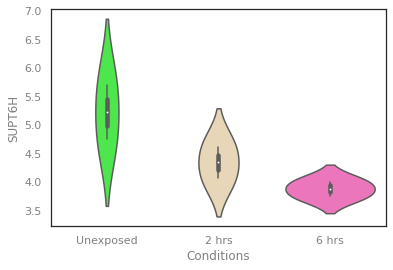

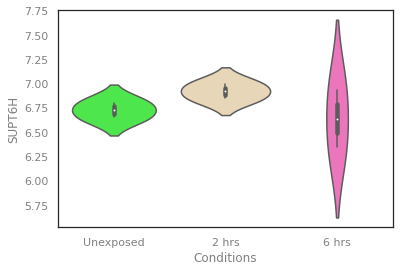

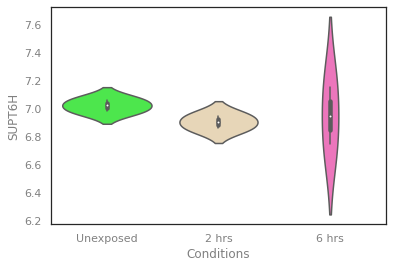

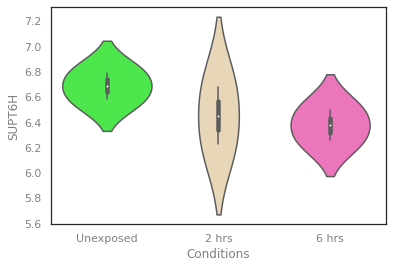

In [40]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getDonnellan2007()

df = pd.read_csv(ana.h.getExprFile(), sep="\t")
del df['ProbeID']
df = df[df['Name'].str.contains("SUPT6")]
df['Name'] = df['Name'].str.split(':').str[0]
df = df.set_index('Name')
df = df.T

df2 = pd.read_csv(ana.h.getSurv(), sep='\t')
df2 = df2[['ArrayId', 'c source_name (ch1)']]

df = pd.merge(df, df2, left_index=True, right_on='ArrayId')
df = df.rename(columns={'c source_name (ch1)':'Condition'})

df = df[(df['Condition']=='unexposed cells') | (df['Condition']=='2 hours after 15 minute exposure to acid, pH 4.5')
        | (df['Condition'] == '6 hours after 15 minute exposure to acid, pH 4.5')]


groups = [(df['Condition'] == 'unexposed cells'),
         (df['Condition'] == '2 hours after 15 minute exposure to acid, pH 4.5'),
         (df['Condition'] == '6 hours after 15 minute exposure to acid, pH 4.5')]

values = ['Unexposed', '2 hrs', '6 hrs']
df['Conditions'] = np.select(groups, values)

sns.set_context("notebook")
for i in range(len(df.columns)):
    if df.columns[i] != 'ArrayId' and df.columns[i] != 'Condition' and df.columns[i] != 'Conditions':
        ax = sns.violinplot(x="Conditions", y=df.iloc[:,i], data=df, order=['Unexposed', '2 hrs', '6 hrs'])
        plt.show()





Sørensen 2015 pH human carcinomas (in vitro) (n = 32)
GSE70051 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE25
32 [10, 10, 4, 4, 4] GSE70051 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=BE25 BE25


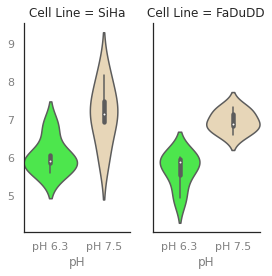

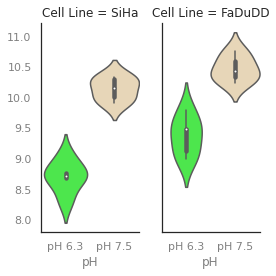

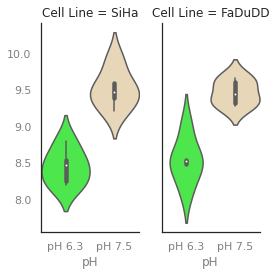

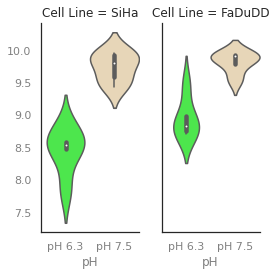

In [41]:
import bone
reload(bone)
ana = BESAnalysis()
ana.getSorensen2015()

df = pd.read_csv(ana.h.getExprFile(), sep="\t")
del df['ProbeID']
df = df[df['Name'].str.contains("SUPT6")]
df['Name'] = df['Name'].str.split(':').str[0]
df = df.set_index('Name')
df = df.T

df2 = pd.read_csv(ana.h.getSurv(), sep='\t')
df2 = df2[['ArrayId', 'c cell line (ch1)', 'c ph (ch1)']]
df2 = df2.rename(columns={df2.columns[1]: "Cell Line"})
df2 = df2.rename(columns={df2.columns[2]: "pH"})

df = pd.merge(df, df2, left_index=True, right_on='ArrayId')
df = df[(df['Cell Line'] == 'SiHa') | (df['Cell Line'] == 'FaDuDD')]

for i in range(len(df.columns)):
    if df.columns[i] != 'ArrayId' and df.columns[i] != 'Cell Line' and df.columns[i] != 'pH':
        g = sns.FacetGrid(df, col="Cell Line", height=4, aspect=.5)
        g.map(sns.violinplot, "pH", y=df.iloc[:,i], order=["pH 6.3", "pH 7.5"], palette=sns.color_palette(),
             width=1, height=1)
        plt.show()
